In [1]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import numpy as np
import matplotlib.pyplot as pl

In [2]:
#
# Load the data
#

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [3]:
encoder_layers = [
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu')
]

decoder_layers = [
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(28*28, activation='relu')
]

In [4]:
#
# Build the autoencoder
#

autoencoder = keras.Sequential([
    layers.Input(shape=(28*28,))
] + encoder_layers + decoder_layers)

In [5]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
__________________________________________________

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2173
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2122
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2159
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2170
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2165
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.2092
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2071
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2133
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2162
Epoch 10/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2080


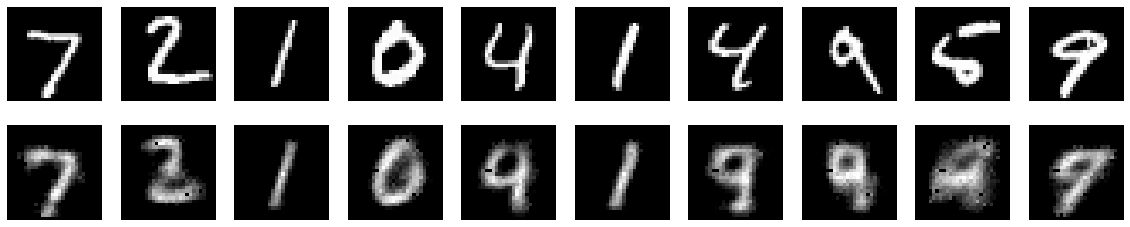

In [12]:
import my
my.plot_reconstruction(autoencoder, x_test, 10)